# AlgLin24: Laboratorio de Imágenes

Como hemos comentado en clase, el poder del Álgebra Lineal (y parte de su creciente popularidad en cursos relacionados con Inteligencia Artificial) reside - en gran parte - en la variedad de aplicaciones que tiene.

Aunque durante nuestro curso de AL nos enfocamos principalmente en definiciones y operaciones con vectores de una manera muy abstracta, es muy emocionante *ver* cómo se traducen todos los conceptos a la hora de trabajar en aplicaciones concretas.

En este laboratorio vamos a hacer algunos ejercicios con Álgebra y con imágenes. El objetivo es doble: por un lado, quisiera invitarles a cultivar la imaginación sobre el uso de las herramientas que vemos en el salón. Por otro, quiero también que practiquen Python para que vayan teniendo más poderes =).

## I. Imágenes digitales

Podemos decir que una imagen es una representación discreta de datos que contiene información espacial (distribución) e información sobre intensidad (color).

Una imagen digital de $m\times n$ pixeles se puede pensar como una matriz de tamaño $m \times n$, cuyo elemento $(i,j)$ representa la intensidad del color en la posición $i, j$.

Por ejemplo, supongamos que estamos trabajando con una imagen en escala de grises y que hemos acordado que el número 0 representa el color negro, el número 255 representa el color blanco, y los números  en el intervalo (0,255) representan las diferentes tonalidades de gris. En esta escala, el número 250 significa un gris muy claro, cercano al blanco; en contraste, el número 15 representaría un gris muy oscuro.

<img src="../figures/grayscaleImages2.png">


Existen diferentes formatos para las imágenes a color, pero generalmente se manejan como la superposición de matrices que representan, cada una, un canal de color. Por ejemplo, en el formato RGB cada imagen es un arreglo de 3 matrices, que corresponden a los colores rojo (R), verde (G) y azul (B).

<img src="../figures/colorImages2.png">





En Python, es posible leer imágenes utilizando el comando **imread** de Matplotlib.

Para hacer un pequeño experimento, vamos a usar una imagen muy famosa del fotógrafo Gerald Waller (1946).

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

I = imread('../figures/orphanNewShoes.jpg')

El comando **shape** nos permite ver el tamaño del arreglo numérico que queda almacenado en la variable $I$.

In [ ]:
I.shape

(894, 640, 3)

Nota que la imagen es de tamaño $894 \times 640 \times 3$. Esto significa que es de 894 por 640 pixeles, y que tiene 3 canales de color.

Usando manipulación de índices vamos a quedarnos con sólo un canal de
color, para manejar solamente una matriz (en vez de tres).

In [ ]:
A = I[:,:,0].copy() # no quiero crear una referencia, sino una copia
print(A)

[[209 203 207 ...  52  46  58]
 [220 213 211 ...  57  59  65]
 [208 212 217 ...  51  55  61]
 ...
 [192 189 195 ... 213 211 214]
 [185 178 181 ... 216 214 217]
 [185 177 178 ... 217 215 219]]


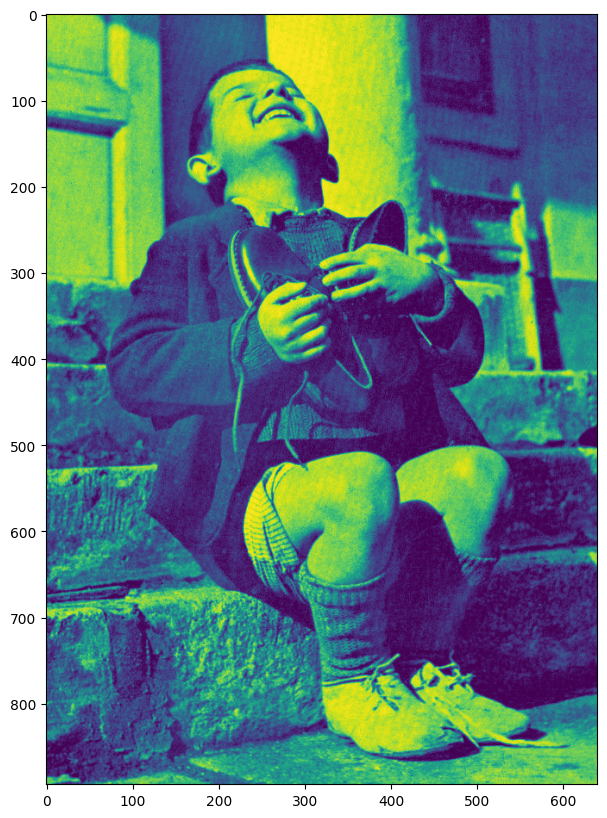

In [ ]:
plt.imshow(A)

Podemos cambiar el mapa de color con la opción **cmap** de **imshow**.

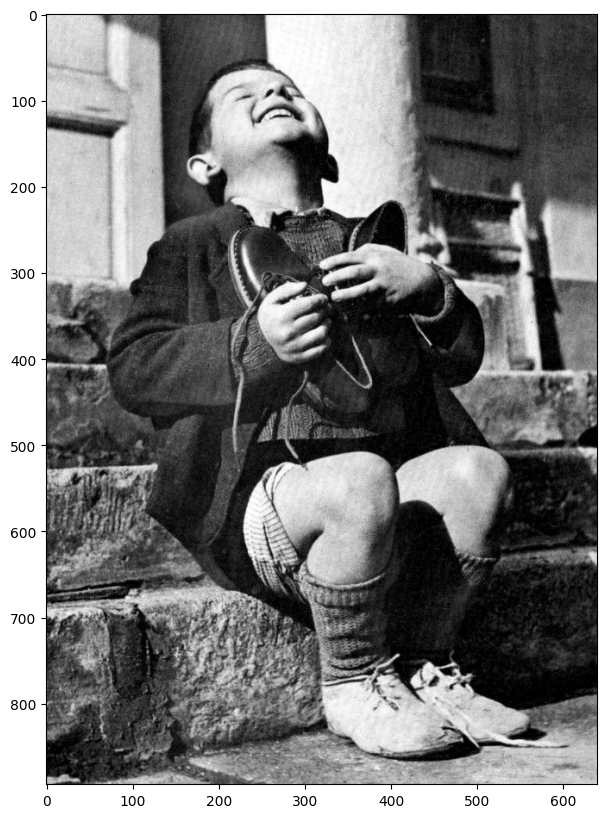

In [ ]:
plt.imshow(A,cmap='gray')

Otras opciones son 'bone', 'copper' y otras más que aparecen en la documentación de Matplotlib.  ¡Juega con ellas!

<img src="../figures/cmaps.png">

# II. Manipulación de matrices en Python

Todo lo que vimos en nuestro primer laboratorio sobre manipulación de índices e índices lógicos se puede utilizar sobre nuestra matriz $A$.

Por ejemplo, considera que quiero extraer el bloque (submatriz) que va de la fila 50 a la 200, y de la columna 150 a la 370.  Esto lo puedo expresar como:

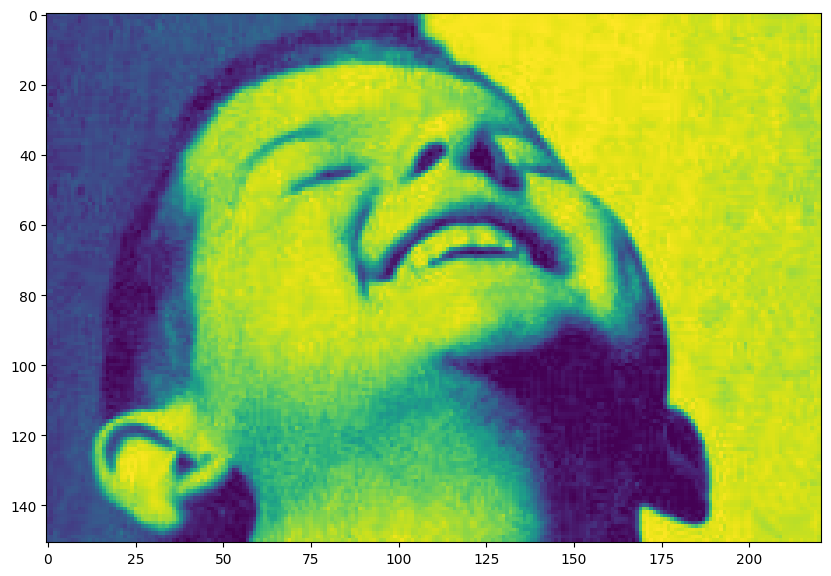

In [ ]:
S = A[50:201,150:371]
plt.imshow(S)

También podría remplazar ese bloque por el color negro.

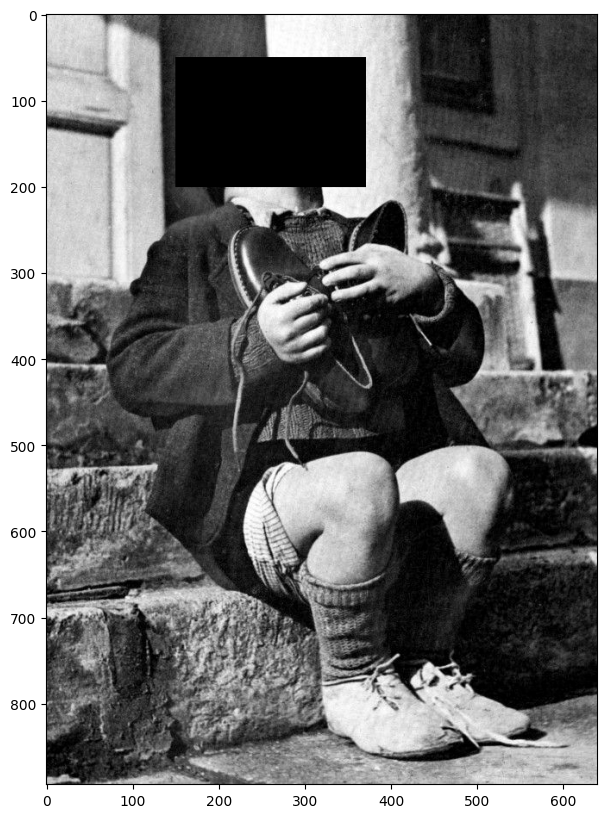

In [ ]:
A[50:201,150:371] = 0
plt.imshow(A, cmap='gray')

<div class="alert alert-block alert-danger">

## EJERCICIO 1:
</div>

    Sin utilizar ciclos *for*, agrega un marco a la imagen para que luzca como la que se muestra a continuación

<img src="../figures/orphanFrame.png">

In [ ]:
E1 = I[:,:,0].copy()

In [ ]:
# Bordes laterales
E1[:, :50] = 0
E1[:, 590:] = 0
# Bordes inferior y superior
E1[:50, :] = 0
E1[844:, :] = 0

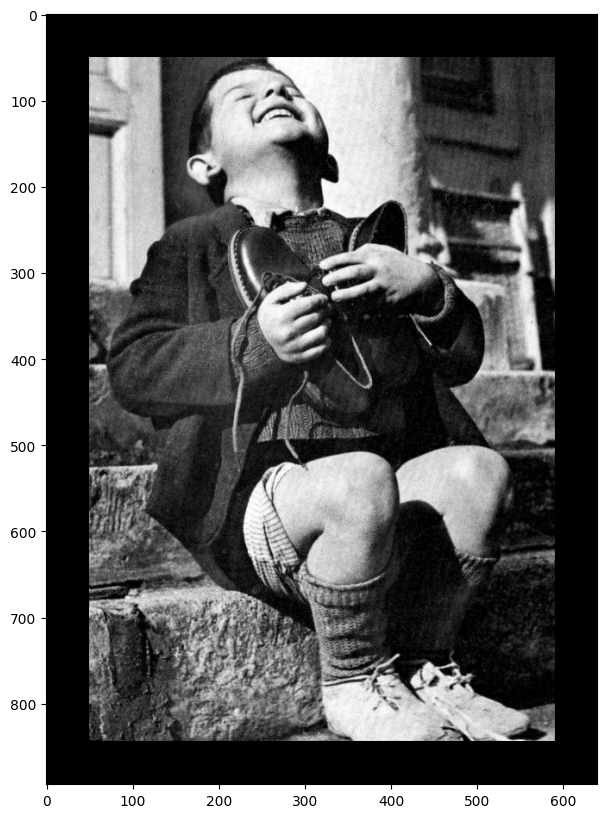

In [ ]:
plt.imshow(E1, cmap='gray')

### Máscaras
Además, puedo crear máscaras usando operadores de comparación.

In [ ]:
# Cargar de nuevo la imagen original
A = I[:,:,0].copy()
umbral  = 130
mascara = A < umbral
print(mascara)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Posteriormente, puedo utilizar la máscara para manipular mi imagen. Por ejemplo, voy a pedir que todos los pixeles que tienen una intensidad menor a un umbral (digamos, 130), se vuelvan negro.

[[209 203 207 ...   0   0   0]
 [220 213 211 ...   0   0   0]
 [208 212 217 ...   0   0   0]
 ...
 [192 189 195 ... 213 211 214]
 [185 178 181 ... 216 214 217]
 [185 177 178 ... 217 215 219]]


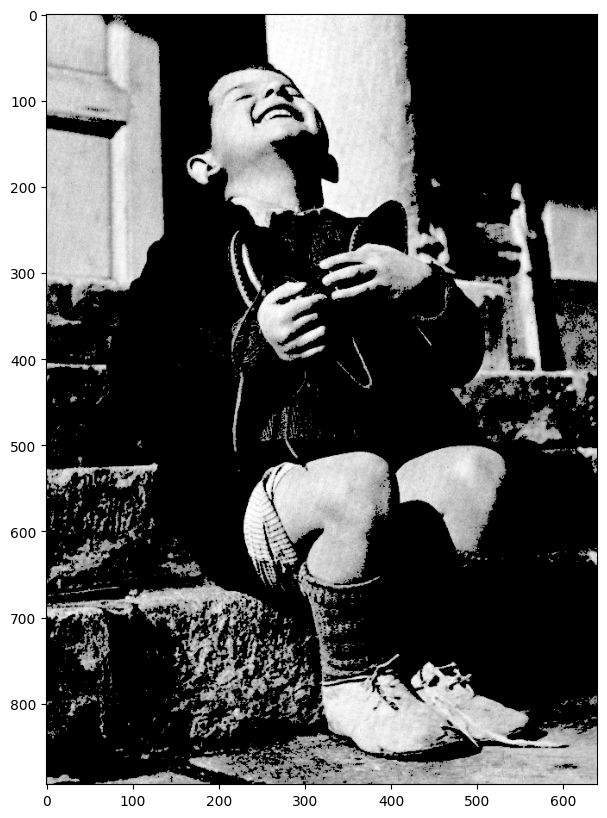

In [ ]:
A[mascara] = 0
print(A)
plt.imshow(A,cmap='gray')

<div class="alert alert-block alert-danger">

## EJERCICIO 2:
</div>

    Ahora binariza la imagen, es decir, en lugar de tener una imagen escala de grises, queremos tener una imagen estrictamente en blanco y negro.
    
    Para lograr esta tarea, considera un umbral DELTA. Todos los valores por encima de DELTA deben ser de color blanco; el resto de pixeles deben ser negros. Prueba diferentes valores de DELTA hasta obtener un resultado que te parezca apropiado.  

In [ ]:
E2 = I[:,:,0].copy()

In [ ]:
suma_total = sum(sum(fila) for fila in E2)
print(suma_total)

58300201


In [ ]:
total_elementos = sum(len(fila) for fila in E2)
print(total_elementos)

572160


In [ ]:
promedio = suma_total / total_elementos
print(promedio)

101.89492624440716


In [ ]:
E2[E2 <= 100] = 0
E2[E2 > 100] = 255

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
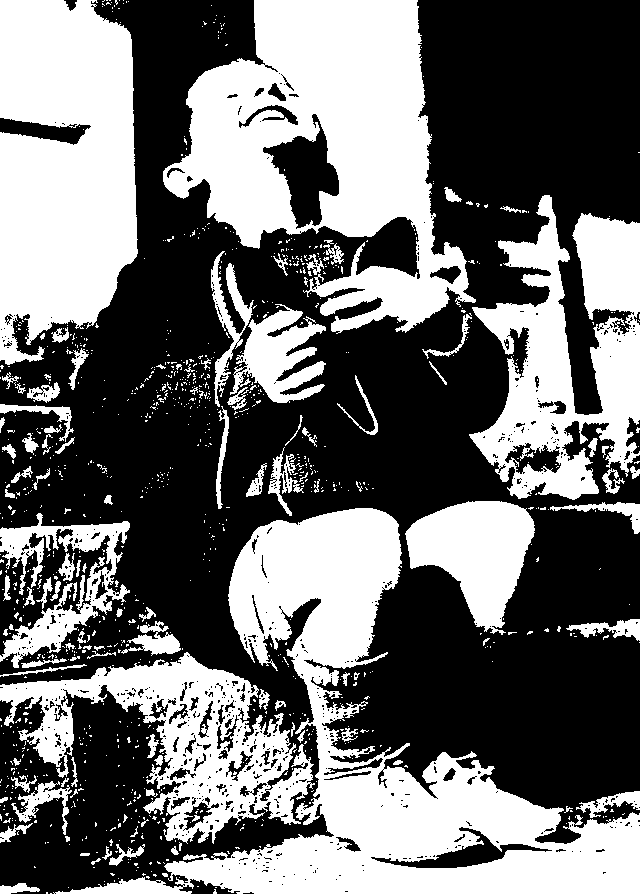

In [ ]:
E2

# III. Álgebra lineal & Imágenes

De acuerdo a lo que estudiamos en clase, el conjunto de todas las matrices de tamaño $894 \times 640$, con la suma y el producto escalar habituales, representa un espacio vectorial.

¿Cómo interpretamos, en este contexto, las operaciones entre vectores? ¿Cómo se ven combinaciones lineales?  

En esta sección vamos a intentar explorar estas preguntas.

## IIIa. Multiplicación escalar


Considera nuevamente la matriz $A$ de la sección anterior. ¿Qué significa en este contexto multiplicar por un escalar? ¿Qué pasará si el escalar es negativo? ¿si es menor que 1, por ejemplo, 1/2? ¿si es mayor a 1?

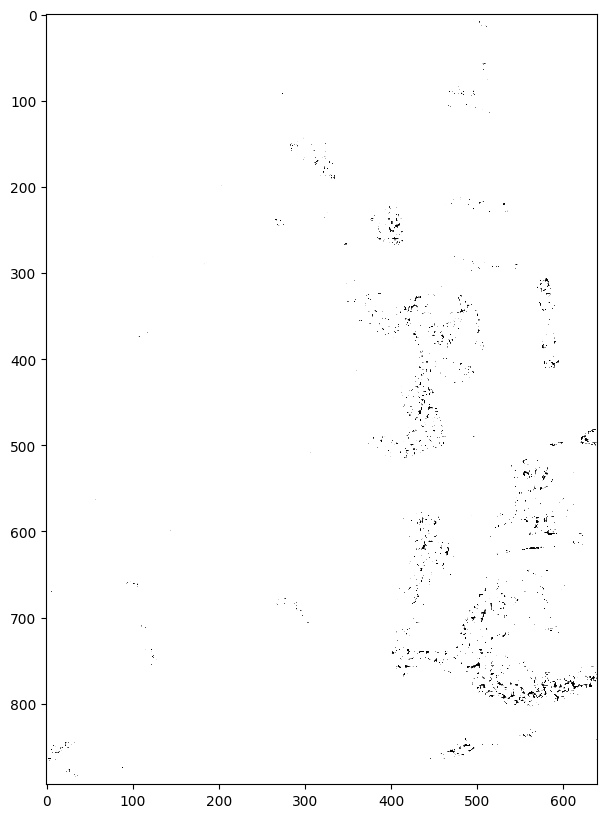

In [ ]:
A = I[:,:,0].copy()
k = 400
plt.imshow(k*A,cmap='gray',vmin=0,vmax=256)
plt.savefig("400.png")

<div class="alert alert-block alert-danger">

## EJERCICIO 3:
</div>

    En la celda anterior, juega con el valor de $k$ y observa qué sucede con las imágenes.
    
    Escribe tus conclusiones, describiendo el efecto del producto escalar para este espacio vectorial de imágenes 894 x 640. Acompaña tus conclusiones de al menos tres imágenes (sálvalas, usando el comando plt.savefig) que te parezcan representativas.

1. Los valores negativos no están dentro del conjunto del espacio vectorial, por lo tanto la multiplicación por un escalar negativo siempre resulta en una imagen negra.
    <img src="../figures/negativos.png">
2. Multiplicar por 1 no afecta la imagen en absoluto.
    <img src="../figures/uno.png">
3. El valor máximo que puede tomar un elemento de la matriz es 255 por lo tanto mientras más grande sea el escalar más deformará la imagen hasta llegar al blanco total.

    <img src="../figures/cien.png">
    <img src="../figures/400.png">

## III.b  Suma

Como seguramente recuerdas de nuestro hermoso tiempo juntxs en el aula, la suma sólo está definida para vectores del mismo espacio. En este caso, sólo podemos sumar matrices que tengan el mismo tamaño.

Para explorar la suma vectorial, vamos a suponer que poco tiempo después de tomar la fotografía del niño huérfano feliz, un investigador paranormal notó modificaciones raras en la foto.

<div class="alert alert-block alert-danger">

## EJERCICIO 4:
</div>

    Completa el código de las siguientes celdas y genera la imagen A+B.

In [ ]:
# Primero, cargamos nuevamente la imagen del niño
A = I[:,:,0].copy()

# Ahora lee la imagen evilClown1.png, y crea la matriz B
B = imread('../figures/evilClown1.png')
B = B[:, :, 0].copy()

Vamos a observar la escala de B.

In [ ]:
print(B)

[[1.         1.         1.         ... 0.07058824 0.07058824 0.07058824]
 [1.         1.         1.         ... 0.08235294 0.08235294 0.08235294]
 [1.         1.         1.         ... 0.08235294 0.08235294 0.08235294]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


Nota que, en este caso, en lugar de trabajar con una intensidad expresada en el intervalo [0,255], se tiene una representación en el intervalo [0,1]. Para modificar la imagen $B$ y que tenga una escala similar a $A$ simplemente vamos a multiplicar por 255 (¿por qué esto funciona?).

In [ ]:
B = 255*B

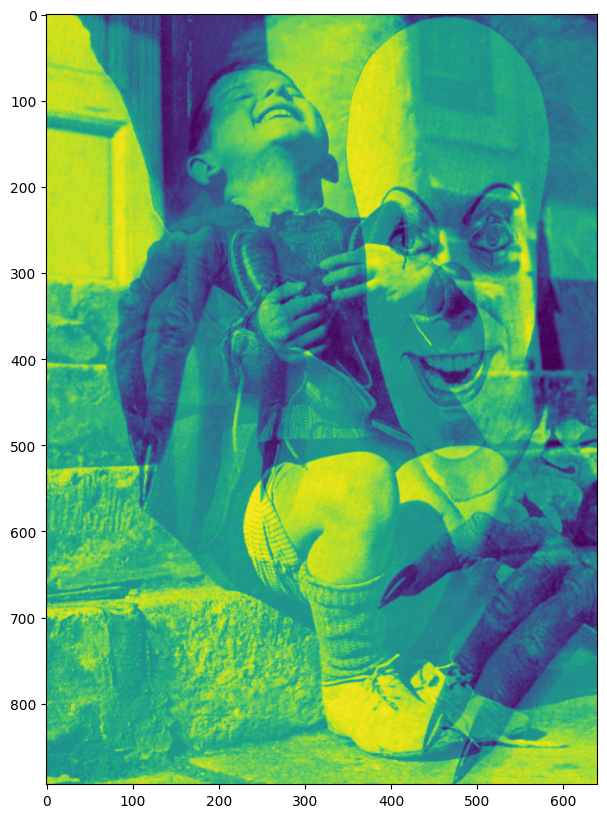

In [ ]:
plt.imshow(A + B)

<div class="alert alert-block alert-danger">

## EJERCICIO 5:
</div>

    Describe el efecto de la suma (en el contexto de imágenes) con
    tus propias palabras.

Aparentemente es una superposición en las imágenes.

## III.c Combinaciones lineales convexas

Recordemos que, para quienes trabajamos en ciencia de datos, las combinaciones lineales pueden interpretarse como recetas: los vectores que considero son los ingredientes, los pesos que utilizo me indican la dosis que estoy usando de cada ingrediente.

En el caso de las imágenes, alterar los pesos de una combinación lineal va a tener un efecto muy claro.

Piensa, por ejemplo, en qué pasa si combino las imágenes del niño y el payaso diabólico usando una proporción de 3:1.

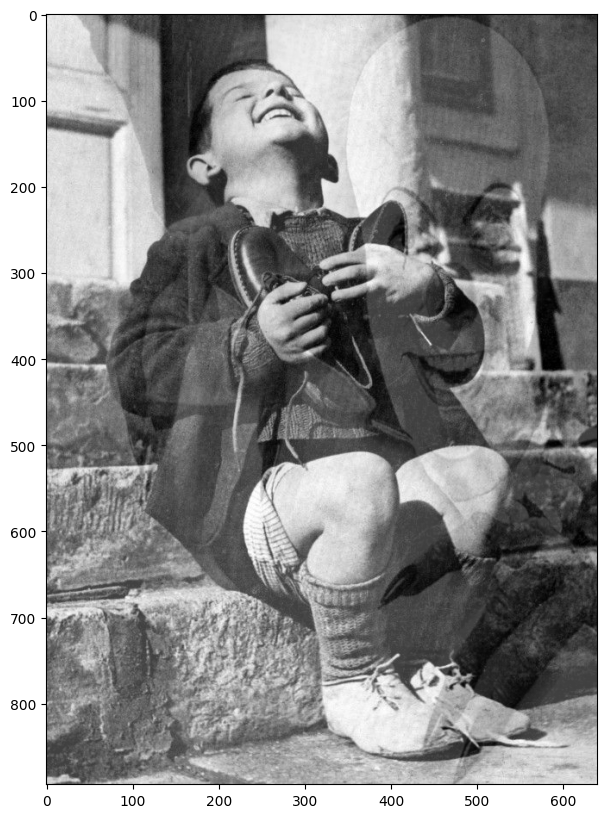

In [ ]:
combLineal = .75*A + .25*B

plt.imshow(combLineal, cmap='gray')

Ahora vamos a invertir las proporciones

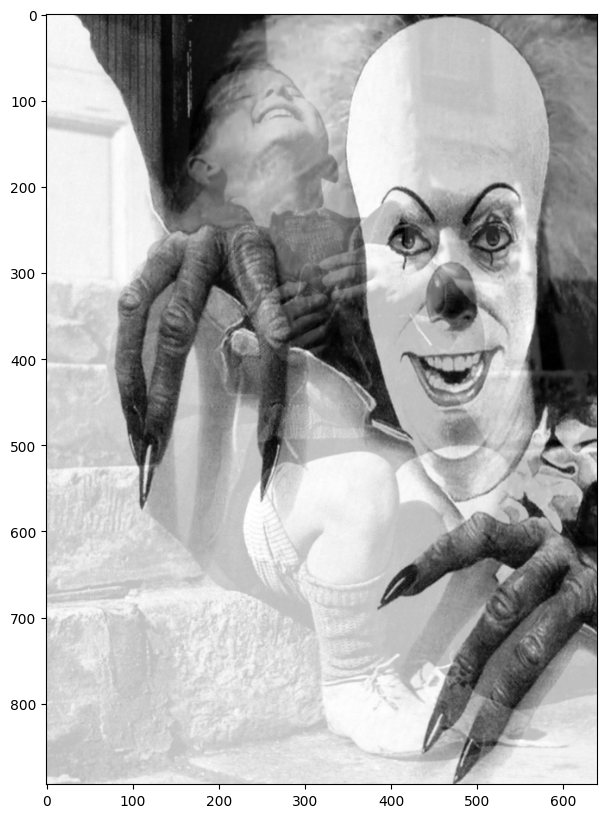

In [ ]:
combLineal = .25*A + .75*B

plt.imshow(combLineal, cmap='gray')

<div class="alert alert-block alert-danger">

## EJERCICIO 6:
</div>

    ¿Qué se observa al invertir los pesos?
    Explica las imágenes que se obtienen.

Al invertir los pesos simplemente parece que la imagen que estaba atrás ahora está al frente.
La imagen que tenga mayor peso será más clara y parecerá que está más al fondo o más difuminada.

Existe un tipo especial de combinaciones lineales, en las que la suma de los pesos es 1. Es decir, se tiene
$$\alpha*A + \beta * B$$
con $$\alpha + \beta = 1.$$

Este tipo de combinaciones reciben el nombre de *combinaciones lineales convexas*.

Considera la expresión
$$C = (1-\alpha) * A + \alpha*B,$$
que claramente es una combinación lineal convexa. ¿Qué sucede si con esta combinación lineal si vamos variando $\alpha$ en el intervalo $[0,1]$?

Piensa, por ejemplo, quién es $C$ cuando $\alpha = 0$, quién es $C$ cuando $\alpha = 1$ y quién cuando $\alpha = 0.5$

Para investigar esto a mayor profundidad, vamos a utilizar el comando **subplot** de matplotlib para generar un conjunto de 9 combinaciones lineales convexas de nuestras imágenes.

Para variar $\alpha$ vamos utilizar valores generados con el comando **linspace**.  SI NO TE ACUERDAS de este comando, gugléalo y asegúrate de entender qué hace.

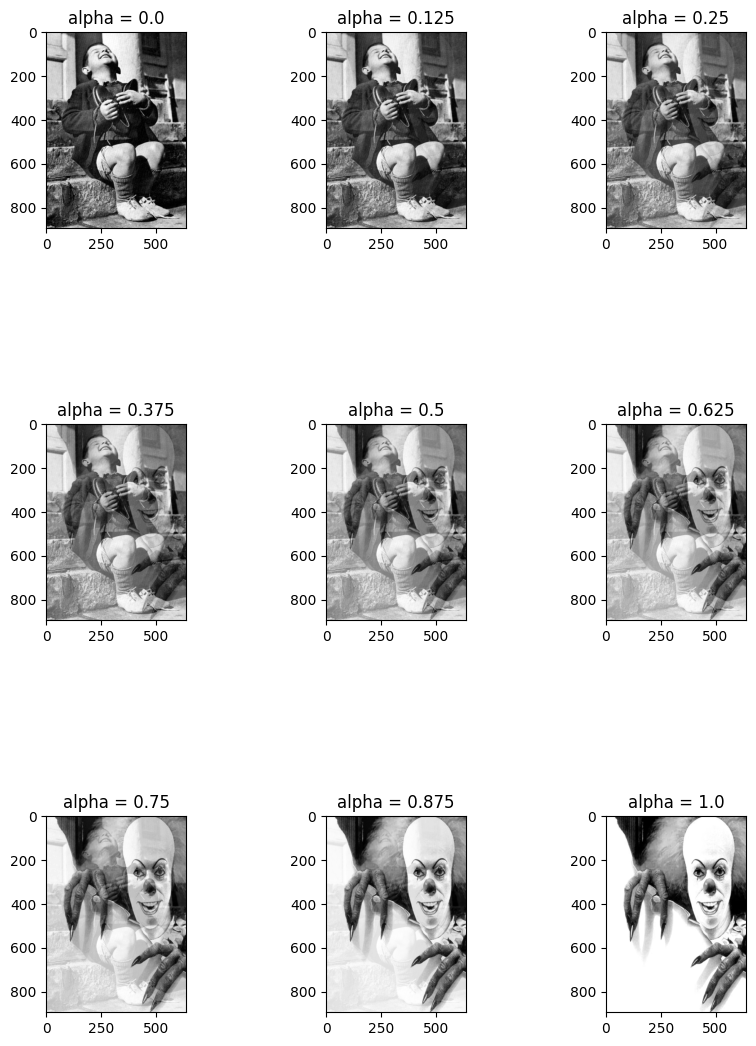

In [ ]:
import numpy as np

# Estas lineas son para controlar el tamaño de la figura:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.3)

# En las siguientes líneas generamos nuestras 9 combinaciones lineales
N = 9
alphaVector = np.linspace(0,1,N)

for i in range(N):
    plt.subplot(3,3,i+1)
    alpha = alphaVector[i]
    C = (1-alpha)*A + alpha*B
    plt.imshow(C,cmap='gray')
    plt.title('alpha = '+str(alpha))

Este enfoque permite generar una secuencia para transitar gradualmente de una imagen inicial a una final.  

Con los efectos especiales que se tienen ahora, puede parece poco emocionante, pero exactamente esta idea de superponer imágenes se utilizó en un clásico de terror, la película "The Wolf Man" (Waggner, 1941) y que puedes observar aquí:

https://youtube.com/clip/UgkxrX9vYnCQPRNTOXYE5Z2bxFvuUj6I7ei3?si=z5YR0U2MjMlgZB07

Cincuenta años más tarde, en 1991, Michael Jackson impactó al mundo con el video de *Black or White*, que muestra claros avances en la transición entre imágenes. Este video utiliza algo conocido como *morphing*, que también tiene su base en álgebra lineal <3.

https://youtu.be/n5b_nIzdvfI?si=zSfqVwdME8FjDEIP


<div class="alert alert-block alert-danger">

# TAREA:
</div>

El entregable de esta sesión de laboratorio es lo siguiente:

1. Una versión de este cuaderno ipynb, que contenga todo los ejercicios (señalados en secciones anteriores) completos.

2. El cuaderno debe contenter también un meme construido artesanalmente. Para ello, combina dos imágenes para hacer un meme, no con aplicaciones online, ni con templates espurios jaja, sino con EL PODER DEL ÁLGEBRA LINEAL!!

<img src="../figures/boardGuy.jpg">

Bueno, ya en serio, lo que tienes que hacer de tarea es construir un meme como el que muestro a continuación:

<img src="../figures/memeAnaya.jpg">

Para construirlo, utiliza solamente Python y dos imágenes de tu preferencia. Esto quiere decir que vas a necesitar subplot, imread, combinaciones lineales convexas y otros detalles vistos en esta sesión.

Al mejor meme le voy a dar unos puntitos extras. ¡Qué gane el mejor!


In [ ]:
import cv2
from PIL import Image, ImageDraw, ImageFont

In [ ]:
imagen_A = imread('../figures/children.jpg')
imagen_B = imread('../figures/condones.jpg')

In [ ]:
IA = imagen_A[:, :].copy()
IB = imagen_B[:, :].copy()

In [ ]:
print(IA.shape, IB.shape)

(626, 626, 3) (626, 626, 3)


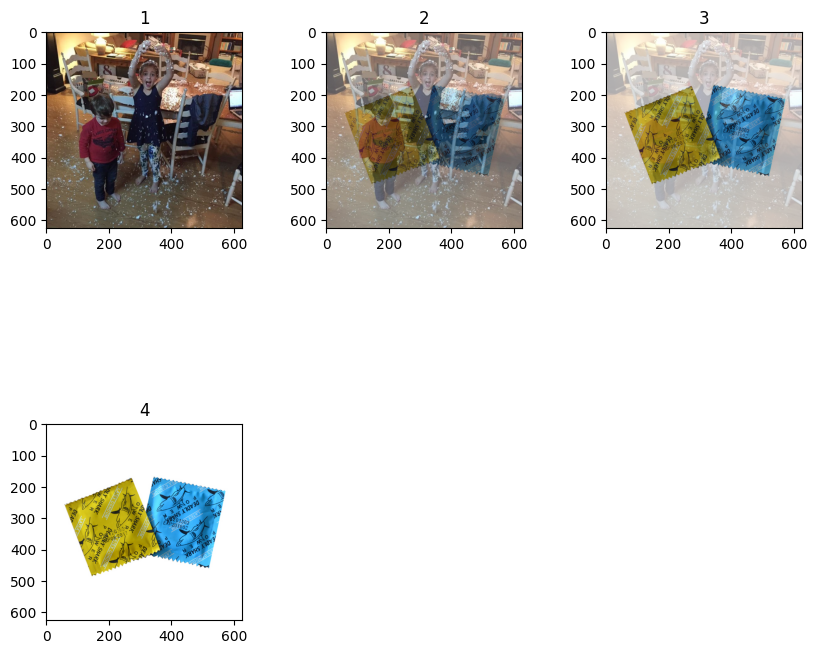

In [ ]:
# Estas lineas son para controlar el tamaño de la figura:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.3)

# En las siguientes líneas generamos nuestras 4 combinaciones lineales
N = 4
alphaVector = np.linspace(0,1,N)
imagenes = []

for i in range(N):
    plt.subplot(3,3,i+1)
    alpha = alphaVector[i]
    C = (1-alpha)*IA + alpha*IB
    imagenes.append(C)
    plt.imshow(C.astype('uint8')) # Manejar los 3 canales de color
    plt.title(str(i+1))

In [ ]:
cuadro1 = imagenes[0].astype('uint8')
cuadro2 = imagenes[1].astype('uint8')
cuadro3 = imagenes[2].astype('uint8')
cuadro4 = imagenes[3].astype('uint8')

In [ ]:
arriba = cv2.hconcat([cuadro1, cuadro2])

In [ ]:
abajo = cv2.hconcat([cuadro3, cuadro4])

In [ ]:
meme = cv2.vconcat([arriba, abajo])

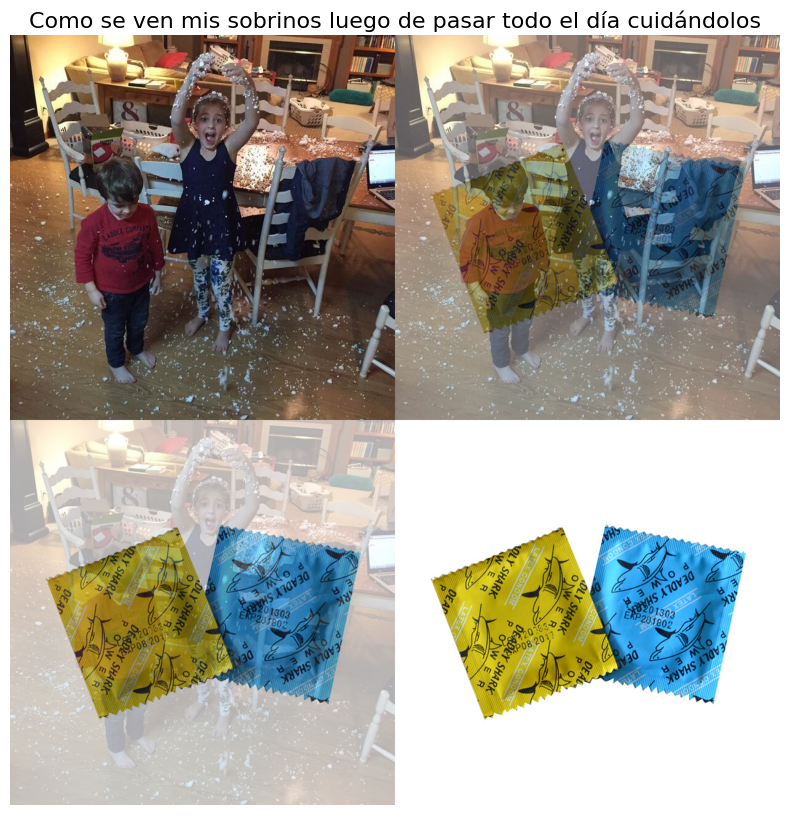

In [ ]:
plt.axis('off')
plt.title('Como se ven mis sobrinos luego de pasar todo el día cuidándolos', size=16)
plt.imshow(meme)
plt.savefig('meme.png')